In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [2]:
df= pd.read_excel("boston housing.xls")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<AxesSubplot:>

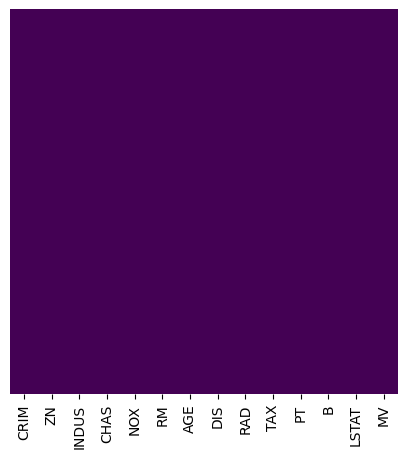

In [4]:
#to check if there are any null values in the dataframe
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

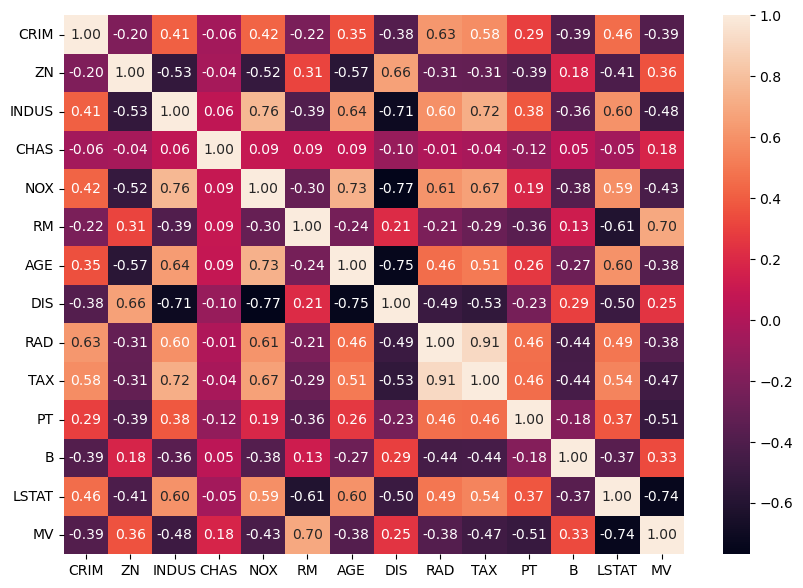

In [5]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show

In [6]:
X= add_constant(df)
vif_df=pd.DataFrame([vif(X.values,i) for i in range (X.shape[1])], index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='constant']
vif_df

,feature,vif_score
0,const,645.977916
1,CRIM,1.831537
2,ZN,2.352186
3,INDUS,3.992503
4,CHAS,1.095223
5,NOX,4.586921
6,RM,2.260374
7,AGE,3.100843
8,DIS,4.396007
9,RAD,7.808199


In [7]:
df=df.drop(columns=['TAX'])

#Recheck VIF
X=add_constant(df)
vif_df=pd.DataFrame([vif(X.values,i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.829538
2,ZN,2.216337
3,INDUS,3.235660
4,CHAS,1.084627
5,NOX,4.578752
6,RM,2.260029
7,AGE,3.098057
8,DIS,4.392557
9,RAD,2.898744
10,PT,1.991741


RMSE: 5.119490


,Actual Value,Predicted Value,Difference
329,22.600000,26.326689,-3.726688
371,50.000000,24.344985,25.655015
219,23.000000,33.235241,-10.235241
403,8.300000,11.310335,-3.010335
78,21.200001,20.895788,0.304213


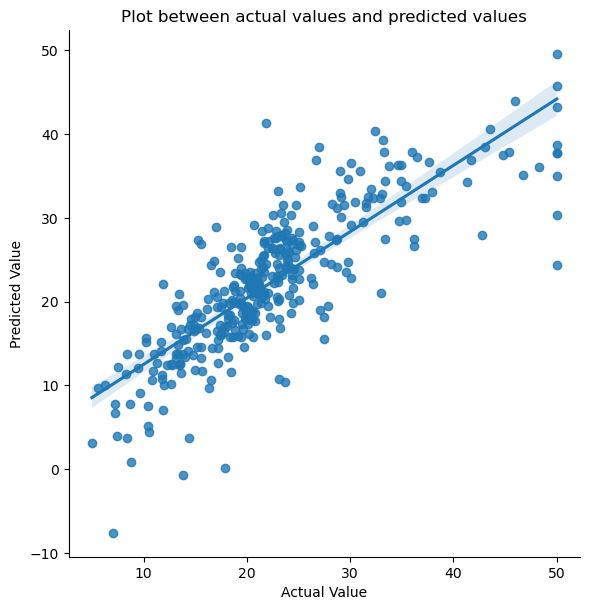

In [8]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

y_pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

sns.lmplot(x='Actual Value', y='Predicted Value', data=y_pred_df, height=6, aspect=1)
ax = plt.gca()
ax.set_title('Plot between actual values and predicted values')
y_pred_df.head()

In [9]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [10]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
xg_reg = xgb.XGBRegressor()


RMSE: 3.792118


,Actual Value,Predicted Value,Difference
410,15.000000,30.981974,-15.981974
85,26.600000,26.428925,0.171076
280,45.400002,46.792656,-1.392654
422,20.799999,18.305094,2.494905
199,34.900002,30.937277,3.962725


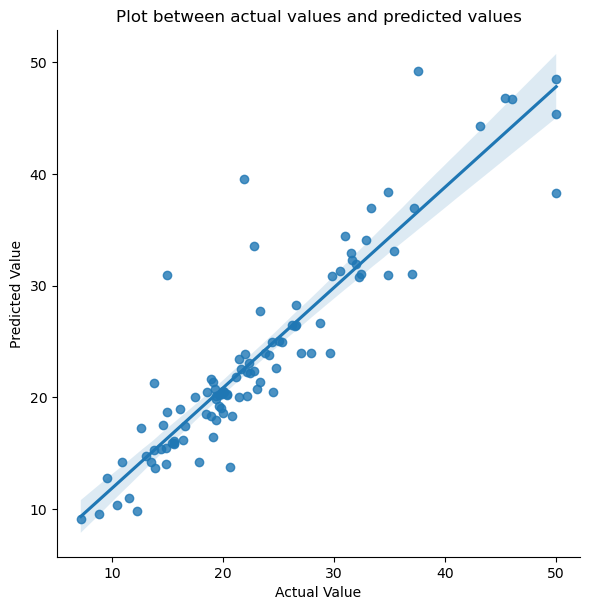

In [13]:
xg_reg.fit(X_train,y_train)

y_preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print("\nRMSE: %f" % (rmse))



y_pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_preds, 'Difference': y_test - y_preds})

sns.lmplot(x='Actual Value', y='Predicted Value', data=y_pred_df, height=6, aspect=1)
ax = plt.gca()
ax.set_title('Plot between actual values and predicted values')
y_pred_df.head()